In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [32]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews.csv")
Hotel_Reviews.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [33]:
AllHotels=Hotel_Reviews.Hotel_Name.unique()


In [34]:
Hotel_Reviews=Hotel_Reviews.take([4,7,10,12,15,16],axis=1)
Hotel_Reviews.head()


,Hotel_Name,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Reviewer_Score,lat,lng
0,Hotel Arena,397,11,2.9,52.360576,4.915968
1,Hotel Arena,0,105,7.5,52.360576,4.915968
2,Hotel Arena,42,21,7.1,52.360576,4.915968
3,Hotel Arena,210,26,3.8,52.360576,4.915968
4,Hotel Arena,140,8,6.7,52.360576,4.915968


In [52]:
lat=np.array([])
lng=np.array([])

hotel_name=np.array([])
hotel_review=np.array([])
no_review=np.array([])

positive_words=np.array([])
negative_words=np.array([])

In [53]:
from math import radians, cos, sin, asin, sqrt

In [54]:
for Hotel in AllHotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    hotel_name=np.append(hotel_name,Hotel)
    
    
    lat=np.append(lat,TEMP.loc[1,'lat'])
    lng=np.append(lng,TEMP.loc[1,'lng'])
   
    hotel_review=np.append(hotel_review,TEMP['Reviewer_Score'].mean())
    no_review=np.append(no_review,len(TEMP['Reviewer_Score']))
    
    positive_words=np.append(positive_words,TEMP['Review_Total_Positive_Word_Counts'].mean())
    negative_words=np.append(negative_words,TEMP['Review_Total_Negative_Word_Counts'].mean())

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

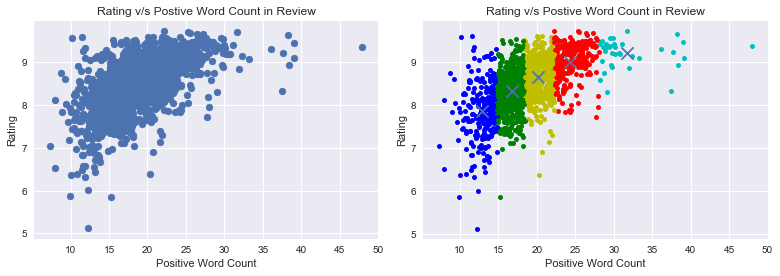

In [103]:
plt.subplot(1, 2, 1)
plt.scatter(positive_words,hotel_review)

KmeansCluster1=np.vstack((positive_words,hotel_review)).T
plt.xlabel('Positive Word Count')
plt.ylabel('Rating')
plt.title("Rating v/s Postive Word Count in Review")

kmeans = KMeans(n_clusters=5)
kmeans.fit(KmeansCluster1)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_



plt.subplot(1, 2, 2)
colors = ["g.","r.","c.","y.","b."]

for i in range(len(KmeansCluster1)):
    plt.plot(KmeansCluster1[i][0], KmeansCluster1[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 7, zorder = 10)
plt.xlabel('Positive Word Count')
plt.ylabel('Rating')
plt.title("Rating v/s Postive Word Count in Review")
plt.tight_layout() 
plt.rcParams['figure.figsize'] = (11, 4)

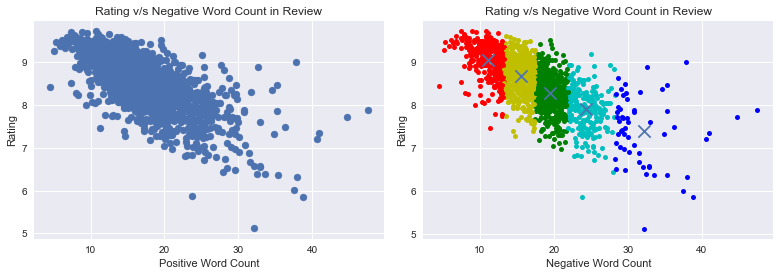

In [107]:



plt.subplot(1, 2, 1)
plt.scatter(negative_words,hotel_review)

KmeansCluster2=np.vstack((negative_words,hotel_review)).T
plt.xlabel('Positive Word Count')
plt.ylabel('Rating')
plt.title("Rating v/s Negative Word Count in Review")

kmeans = KMeans(n_clusters=5)
kmeans.fit(KmeansCluster2)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_



plt.subplot(1, 2, 2)
colors = ["g.","r.","c.","y.","b."]

for i in range(len(KmeansCluster1)):
    plt.plot(KmeansCluster2[i][0], KmeansCluster2[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 7, zorder = 10)
plt.xlabel('Negative Word Count')
plt.ylabel('Rating')
plt.title("Rating v/s Negative Word Count in Review")
plt.tight_layout() 
plt.rcParams['figure.figsize'] = (11, 4)

In [58]:
column=['Hotel_name','no_reviews','mean_reviewer_rating','positive WC','negative WC']
data=np.column_stack((hotel_name,no_review,hotel_review,positive_words,negative_words))

In [100]:
len(KmeansCluster1)

1492

In [74]:
HotelReviewsWC=pd.DataFrame(data,columns=column)

HotelReviewsWC['no_reviews']=pd.to_numeric(HotelReviewsWC['no_reviews'])
HotelReviewsWC['mean_reviewer_rating']=pd.to_numeric(HotelReviewsWC['mean_reviewer_rating'])
HotelReviewsWC['positive WC']=pd.to_numeric(HotelReviewsWC['positive WC'])
HotelReviewsWC['negative WC']=pd.to_numeric(HotelReviewsWC['negative WC'])

In [80]:
HotelReviewsWCNormalised=HotelReviewsWC
HotelReviewsWCNormalised['no_reviews']=(HotelReviewsWC['no_reviews']-HotelReviewsWC['no_reviews'].mean())/HotelReviewsWC['no_reviews'].std()
HotelReviewsWCNormalised['mean_reviewer_rating']=(HotelReviewsWC['mean_reviewer_rating']-HotelReviewsWC['mean_reviewer_rating'].mean())/HotelReviewsWC['mean_reviewer_rating'].std()
HotelReviewsWCNormalised['positive WC']=(HotelReviewsWC['positive WC']-HotelReviewsWC['positive WC'].mean())/HotelReviewsWC['positive WC'].std()
HotelReviewsWCNormalised['negative WC']=(HotelReviewsWC['negative WC']-HotelReviewsWC['negative WC'].mean())/HotelReviewsWC['negative WC'].std()

In [81]:
HotelReviewsWCNormalised

,Hotel_name,no_reviews,mean_reviewer_rating,positive WC,negative WC
0,Hotel Arena,0.134344,-1.014662,1.132542,2.484205
1,K K Hotel George,0.498898,0.216266,0.445714,0.148231
2,Apex Temple Court Hotel,1.565388,1.333958,0.234673,-1.060381
3,The Park Grand London Paddington,3.225128,-1.215115,-0.737491,0.803870
4,Monhotel Lounge SPA,-0.703451,0.610893,3.014840,-0.471843
5,Kube Hotel Ice Bar,-0.739680,-4.200115,-0.772860,3.989860
6,The Principal London,2.443941,-0.704675,-0.554326,0.574133
7,Park Plaza County Hall London,4.250861,-0.158347,-0.358843,0.566052
8,One Aldwych,-0.474756,1.086674,0.590664,-0.259198
9,Splendid Etoile,-0.495134,1.082927,0.521376,-1.542495


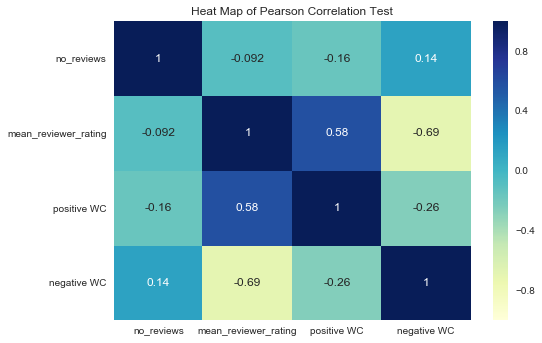

In [83]:
import seaborn as sns
correlation= HotelReviewsWCNormalised.corr()

sns.heatmap(correlation,annot=True,cbar=True,cmap="YlGnBu")
plt.title("Heat Map of Pearson Correlation Test")
plt.show()